In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import warnings
from pprint import PrettyPrinter

warnings.filterwarnings('ignore')

In [ ]:
df1 = pd.read_csv('test.csv')
df2 = pd.read_csv('train.csv')

df1.head()

In [ ]:
df2.head()

In [ ]:
df = pd.concat([df1, df2])

In [ ]:
df.columns

In [ ]:
df = df.drop('Unnamed: 0', axis = 1)


In [ ]:
duplicated = df.duplicated()
number_duplicated = duplicated.sum()

print(number_duplicated)


0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     129880 no

In [ ]:
df.rename(columns={column: column.lower().replace(" ", "_").replace("/", "_").replace("-", "_") for column in df.columns}, inplace=True)
df.rename(columns={"checkin_service": "check_in_service"}, inplace=True)

In [ ]:
df['arrival_delay_in_minutes'].value_counts()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   class                              129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   inflight_wifi_service              129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   ease_of_online_booking             129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  food_and_drink                     129880 no

In [ ]:
df.head()

In [ ]:
# Checking if there is any NaN value

df.isna().sum()[df.isna().sum() > 0]

## Exploratory Data Analysis

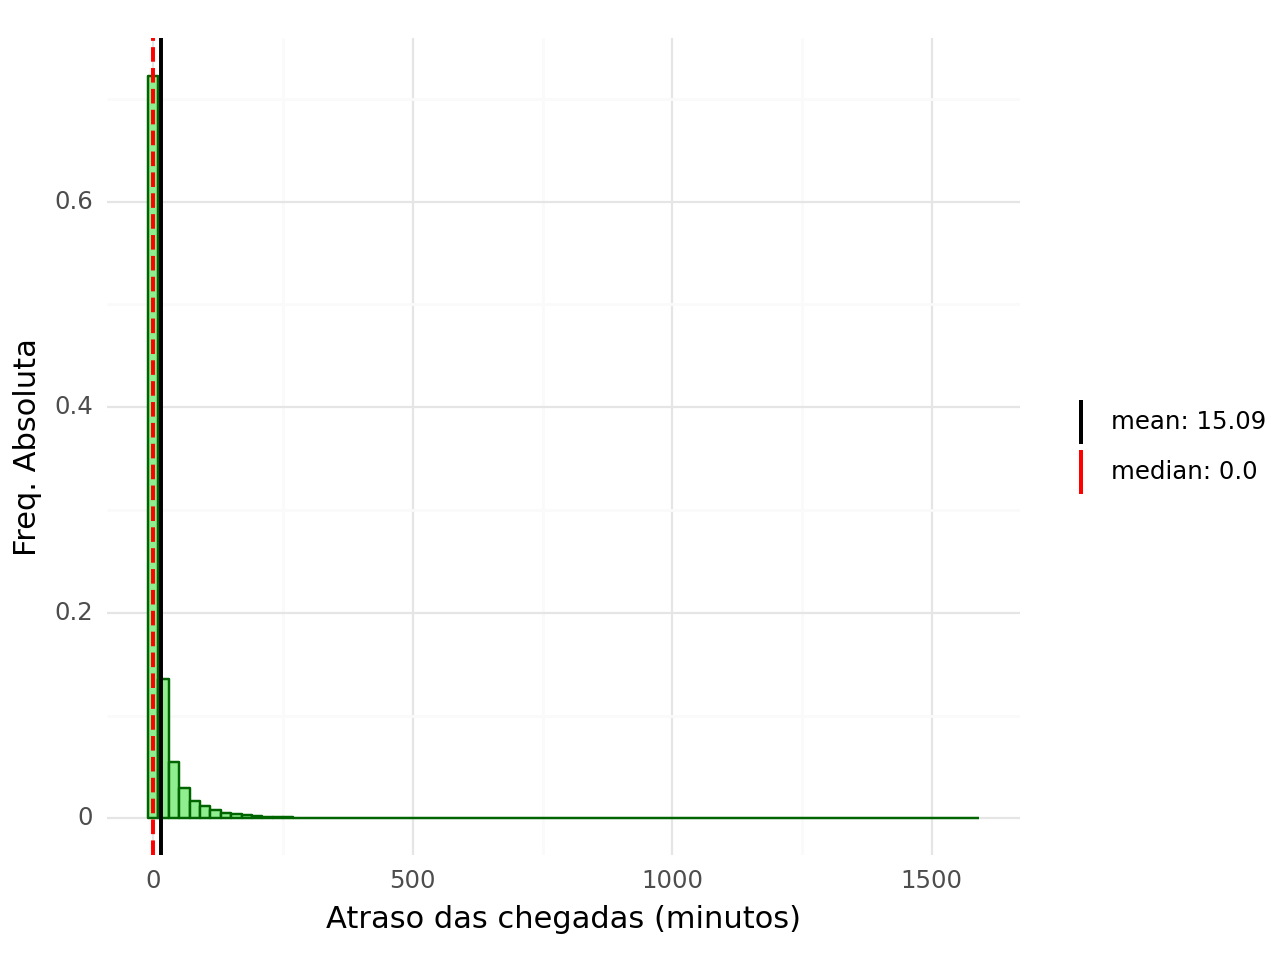

In [ ]:
g=(
    ggplot()
    +geom_histogram(
        data=df,
        mapping=aes(x='arrival_delay_in_minutes', y=after_stat('count/np.sum(count)')),
        binwidth=20,
        color='darkgreen',
        fill='lightgreen'
    )
    +theme_minimal()
    +labs(
        x='Atraso das chegadas (minutos)',
        y='Freq. Absoluta'
    )
    +geom_vline(data=pd.DataFrame({'mean':np.mean(df.arrival_delay_in_minutes.dropna()), 'median':np.median(df.arrival_delay_in_minutes.dropna())}, index=range(2)), 
                mapping=aes(xintercept='median', color='factor(median)'), linetype='dashed', size=.8)
    +geom_vline(data=pd.DataFrame({'mean':np.mean(df.arrival_delay_in_minutes.dropna()), 'median':np.median(df.arrival_delay_in_minutes.dropna())}, index=range(2)), 
                mapping=aes(xintercept='mean', color='factor(mean)'), linetype='solid', size=.8)
    +scale_color_manual(values={np.median(df.arrival_delay_in_minutes.dropna()): 'red', np.mean(df.arrival_delay_in_minutes.dropna()): 'black'}, 
                        labels=[f'mean: {round(np.mean(df.arrival_delay_in_minutes.dropna()), 2)}', f'median: {np.median(df.arrival_delay_in_minutes.dropna())}'])
    +theme(legend_title=element_blank())
)
print(g)


No gráfico acima, vemos forte assimetria à direita. Posteriormente iremos substituir os valores NaN da *feature* `arrival_delay_in_minutes` pela mediana.

In [ ]:
categoricos = df[list(df.select_dtypes('object').columns)[:-1]]
categoricos.head(3)

In [ ]:
def plot_count_bar(df, x_bar:str, rel_freq:bool, labels:dict):
    g = (
    ggplot(data=df)
    +geom_bar(
        aes(x=x_bar, 
            y='..count../sum(..count..)*100' if rel_freq == True else '..count..', 
            color=x_bar, 
            fill=x_bar)
    )
    +labs(**labels)
    +theme(
        legend_title=element_blank()
    )
    +theme_minimal()
    +theme(
        legend_title=element_blank()
    )
)
    print(g)

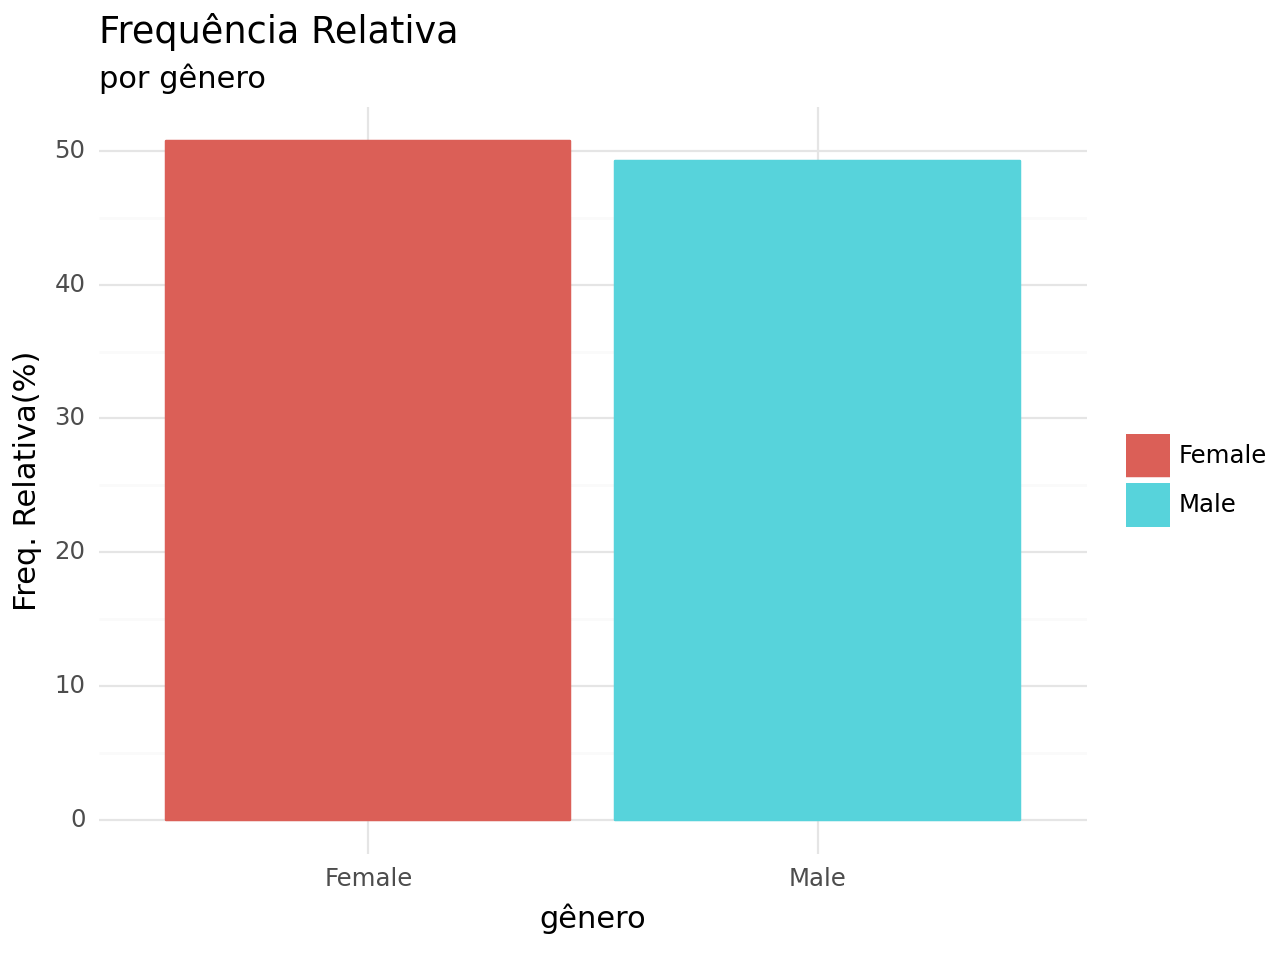

In [ ]:
plot_count_bar(
    df,
    x_bar='gender',
    rel_freq=True,
    labels={'x':'gênero', 
            'y':'Freq. Relativa(%)', 
            'title': 'Frequência Relativa',
            'subtitle': 'por gênero'}
)

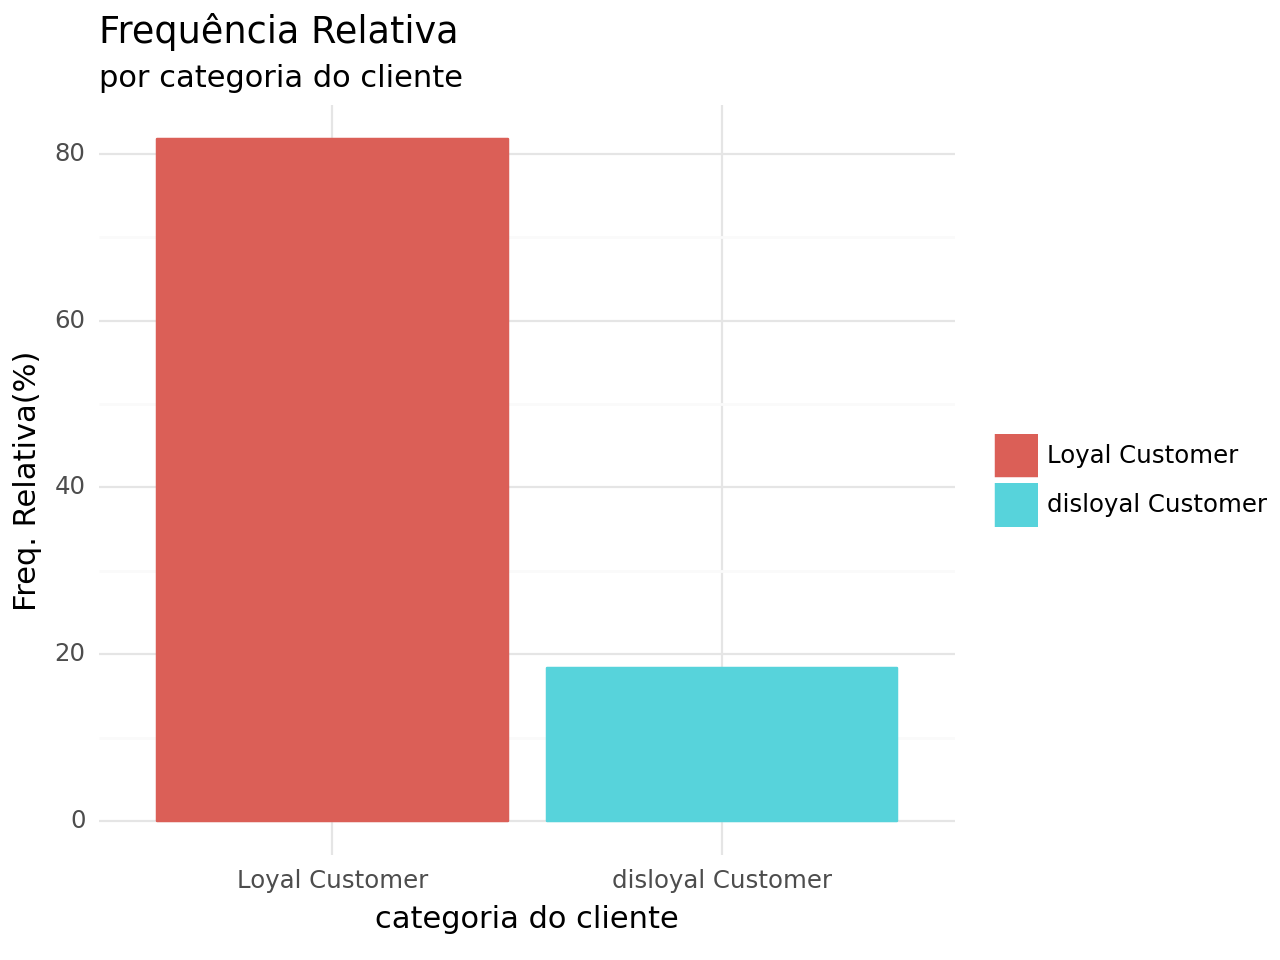

In [ ]:
plot_count_bar(
    df,
    x_bar='customer_type',
    rel_freq=True,
    labels={
        'x': 'categoria do cliente',
        'y': 'Freq. Relativa(%)',
        'title': 'Frequência Relativa',
        'subtitle': 'por categoria do cliente'
    }
)

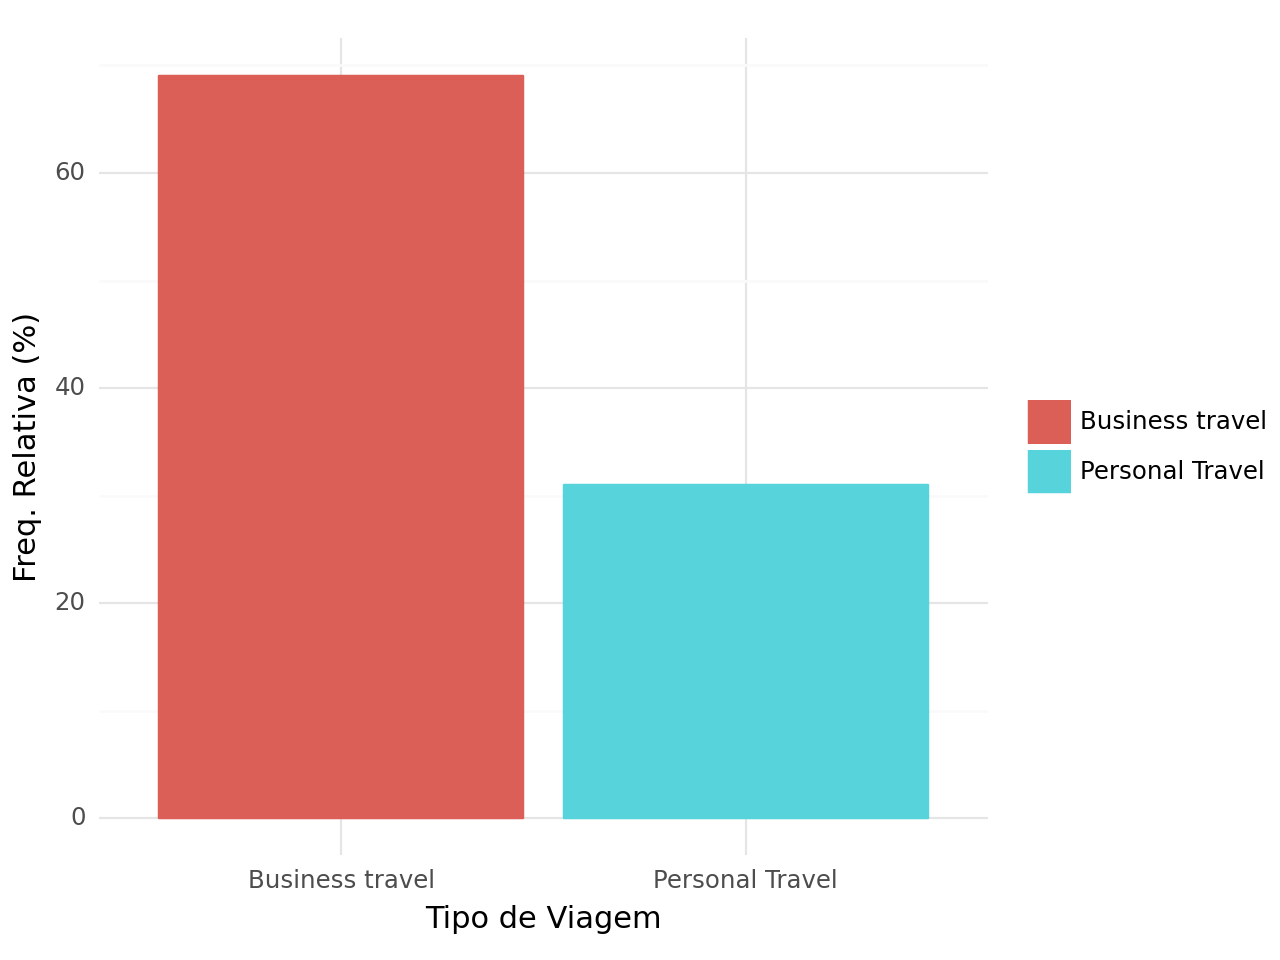

In [ ]:
plot_count_bar(
    df,
    x_bar='type_of_travel',
    rel_freq=True,
    labels={
        'x': 'Tipo de Viagem',
        'y': 'Freq. Relativa (%)'
    }
)

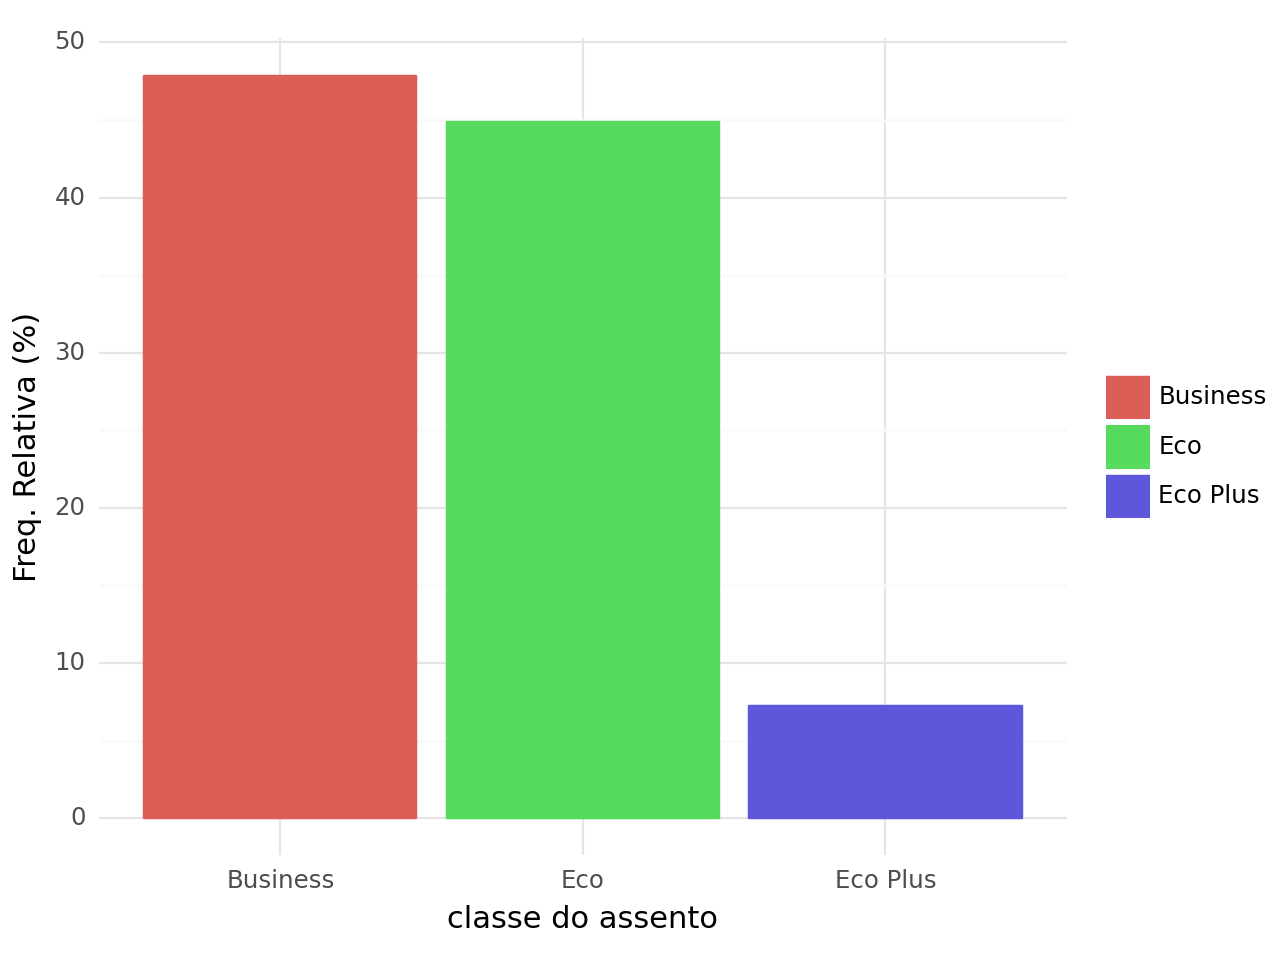

In [ ]:
plot_count_bar(
    df,
    x_bar='class',
    rel_freq=True,
    labels={
        'x':'classe do assento',
        'y': 'Freq. Relativa (%)'
    }
)

In [ ]:
g=(
    ggplot(data=df)
    +geom_bar(
        aes(x='class',
        y='..count..',
        fill='class'
        )
    )
    +facet_grid('satisfaction ~ type_of_travel')
    +theme(legend_title=element_blank())
    +labs(y='Freq. Absoluta')
)
print(g)

Vemos que as pessoas que viajam a negócios e na classe executiva estão em sua maioria satisfeitas. Já o maior grupo de pessoas insatisfeitas é aquele que viaja por razões pessoais e na classe econômica.

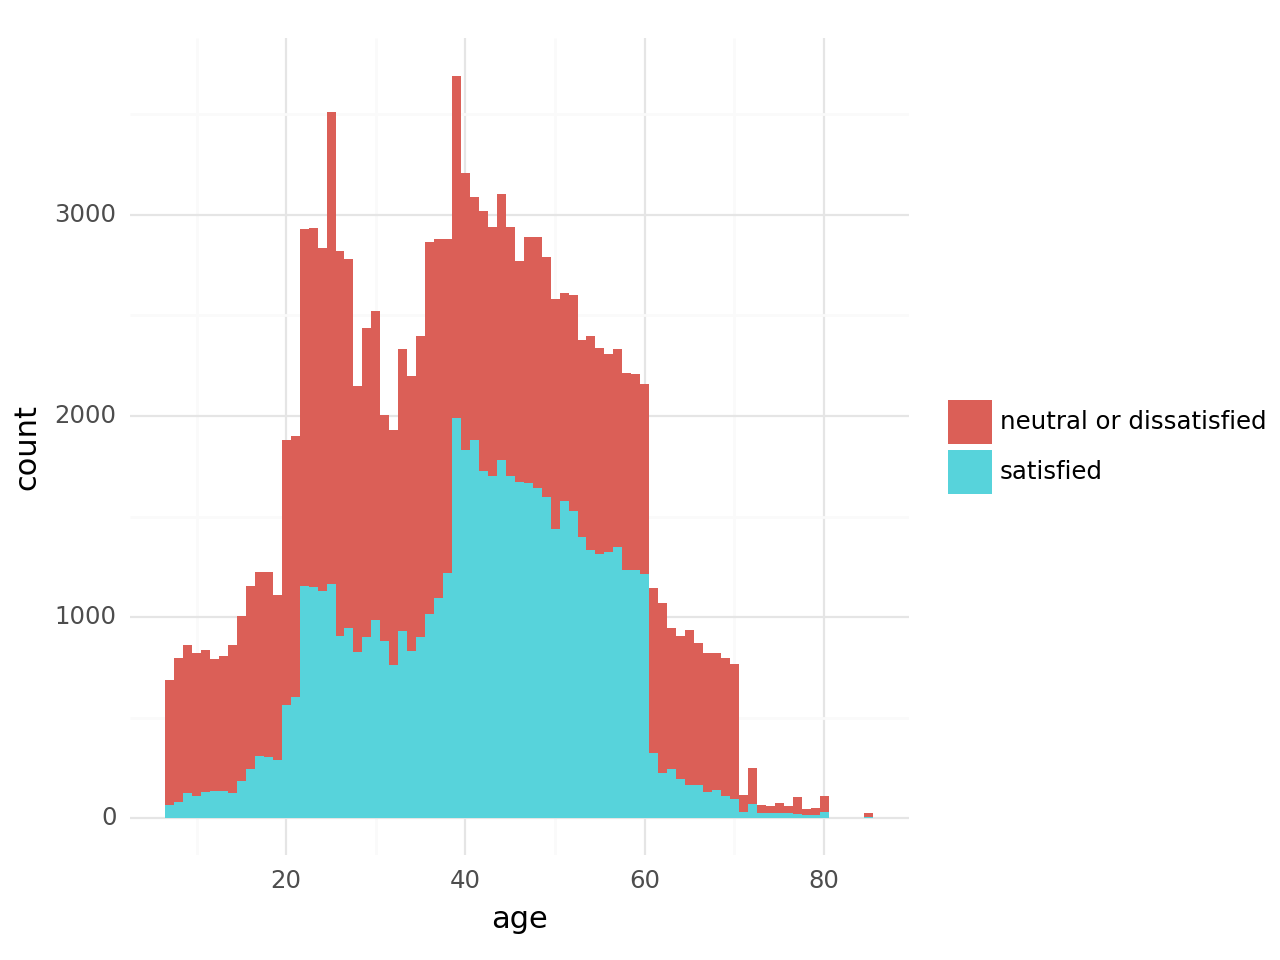

In [ ]:
g=(
    ggplot(data=df)
    +geom_histogram(
        aes(x='age', fill='satisfaction'),
        binwidth=1,
    )
    +theme_minimal()
    +theme(legend_title=element_blank()) 
)
print(g)

Entre 20 e 25 anos e entre 40 a 60 anos, temos maior frequência de clientes satisfeitos. Uma hipótese é que esse é o grupo que mais viaja a negócios devido ao momento da carreira. Como vimos acima, a maior frequência de clientes satisfeitos ocorre com aqueles que viajam a negócios e na classe executiva.

In [ ]:
g=(
    ggplot(data=df, mapping=aes(x='age', fill='type_of_travel'))
    +geom_histogram(binwidth=1, alpha=.5)
    +theme_minimal()
    +theme(legend_title=element_blank())
    +facet_grid('.~class') 
)
print(g)

In [ ]:
g=(
    ggplot(data=df)
    +geom_col(
        aes(
            x='class',
            fill='satisfaction'
        ),
        stat='count',
        position='dodge'
    )
    +facet_grid('.~food_and_drink')
    +theme_minimal()
    +theme(legend_title=element_blank(), figure_size=(16,9))
)
print(g)

A maior satisfação com a comida se mostra nos passageiros que viajam de classe executiva.

In [ ]:
# df['gender'] = np.where(df['gender'] == 'Male', 0, 1)
# df['satisfaction'] = np.where(df['satisfaction'] == 'satisfied', 0, 1)
# df['type_of_travel'] = np.where(df['type_of_travel'] == 'Business travel', 0, 1)
# df['customer_type'] = np.where(df['customer_type'] == 'Loyal Customer', 0, 1)

df.select_dtypes("object")

In [ ]:
# Unique values
pp = PrettyPrinter(indent=4)
pp.pprint({column: sorted(list(df[column].unique())) for column in df.select_dtypes('int64').drop(['flight_distance', 'departure_delay_in_minutes', 'age', 'id'], axis=1).columns})

{   'baggage_handling': [1, 2, 3, 4, 5],
    'check_in_service': [0, 1, 2, 3, 4, 5],
    'cleanliness': [0, 1, 2, 3, 4, 5],
    'departure_arrival_time_convenient': [0, 1, 2, 3, 4, 5],
    'ease_of_online_booking': [0, 1, 2, 3, 4, 5],
    'food_and_drink': [0, 1, 2, 3, 4, 5],
    'gate_location': [0, 1, 2, 3, 4, 5],
    'inflight_entertainment': [0, 1, 2, 3, 4, 5],
    'inflight_service': [0, 1, 2, 3, 4, 5],
    'inflight_wifi_service': [0, 1, 2, 3, 4, 5],
    'leg_room_service': [0, 1, 2, 3, 4, 5],
    'on_board_service': [0, 1, 2, 3, 4, 5],
    'online_boarding': [0, 1, 2, 3, 4, 5],
    'seat_comfort': [0, 1, 2, 3, 4, 5]}


In [ ]:
label_encoder = LabelEncoder()

In [ ]:
type_of_class = df['class']

In [ ]:
label_encoder.fit(type_of_class)

In [ ]:
df['class'] = label_encoder.transform(type_of_class)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df['arrival_delay_in_minutes'] = df['arrival_delay_in_minutes'].replace({np.nan: 0.0}).astype(int)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   id                                 129880 non-null  int64 
 1   gender                             129880 non-null  object
 2   customer_type                      129880 non-null  object
 3   age                                129880 non-null  int64 
 4   type_of_travel                     129880 non-null  object
 5   class                              129880 non-null  int32 
 6   flight_distance                    129880 non-null  int64 
 7   inflight_wifi_service              129880 non-null  int64 
 8   departure_arrival_time_convenient  129880 non-null  int64 
 9   ease_of_online_booking             129880 non-null  int64 
 10  gate_location                      129880 non-null  int64 
 11  food_and_drink                     129880 non-null  int64

In [35]:
df.columns

Index(['id', 'gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on_board_service', 'leg_room_service',
       'baggage_handling', 'check_in_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

In [36]:
df.head().T

,0,1,2,3,4
id,19556,90035,12360,77959,36875
gender,Female,Female,Male,Male,Female
customer_type,Loyal Customer,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer
age,52,36,20,44,49
type_of_travel,Business travel,Business travel,Business travel,Business travel,Business travel
class,1,0,1,0,1
flight_distance,160,2863,192,3377,1182
inflight_wifi_service,5,1,2,0,2
departure_arrival_time_convenient,4,1,0,0,3
ease_of_online_booking,3,3,2,0,4


In [37]:
df.nunique()

id                                   129880
gender                                    2
customer_type                             2
age                                      75
type_of_travel                            2
class                                     3
flight_distance                        3821
inflight_wifi_service                     6
departure_arrival_time_convenient         6
ease_of_online_booking                    6
gate_location                             6
food_and_drink                            6
online_boarding                           6
seat_comfort                              6
inflight_entertainment                    6
on_board_service                          6
leg_room_service                          6
baggage_handling                          5
check_in_service                          6
inflight_service                          6
cleanliness                               6
departure_delay_in_minutes              466
arrival_delay_in_minutes        

In [38]:
df['flight_distance'].describe()

count    129880.000000
mean       1190.316392
std         997.452477
min          31.000000
25%         414.000000
50%         844.000000
75%        1744.000000
max        4983.000000
Name: flight_distance, dtype: float64

In [41]:
df.groupby('satisfaction')['flight_distance'].mean()

satisfaction
neutral or dissatisfied     929.715420
satisfied                  1529.539165
Name: flight_distance, dtype: float64

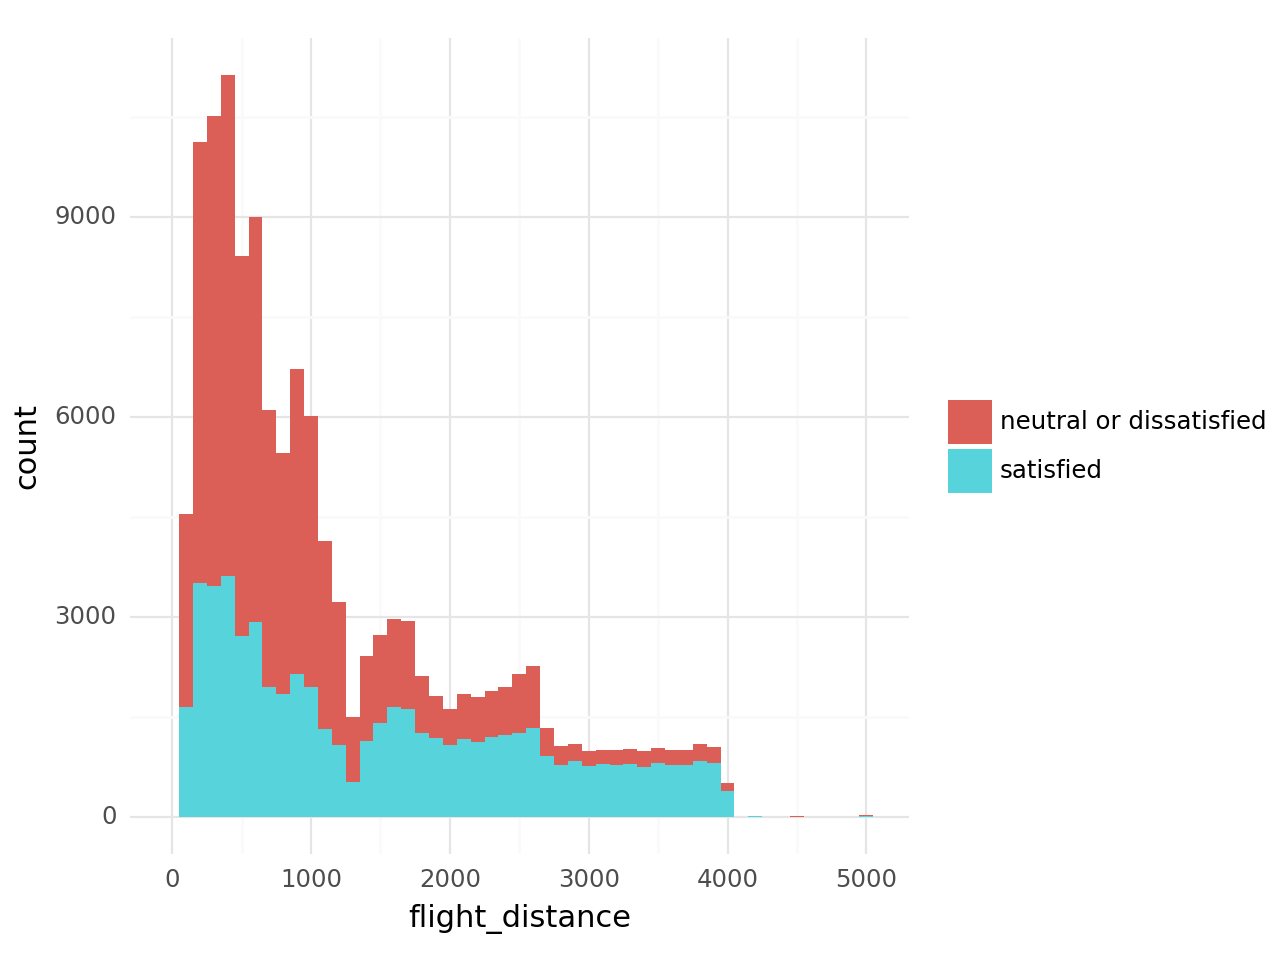

In [45]:
g=(
    ggplot(data=df)
    +geom_histogram(
        aes(x='flight_distance', fill='satisfaction'),
        binwidth=100,
    )
    +theme_minimal()
    +theme(legend_title=element_blank()) 
)
print(g)

Voôs mais longos com maior satisfação dos clientes do que voôs mais curtos. Os voôs mais longos são em sua maioria a negócios?

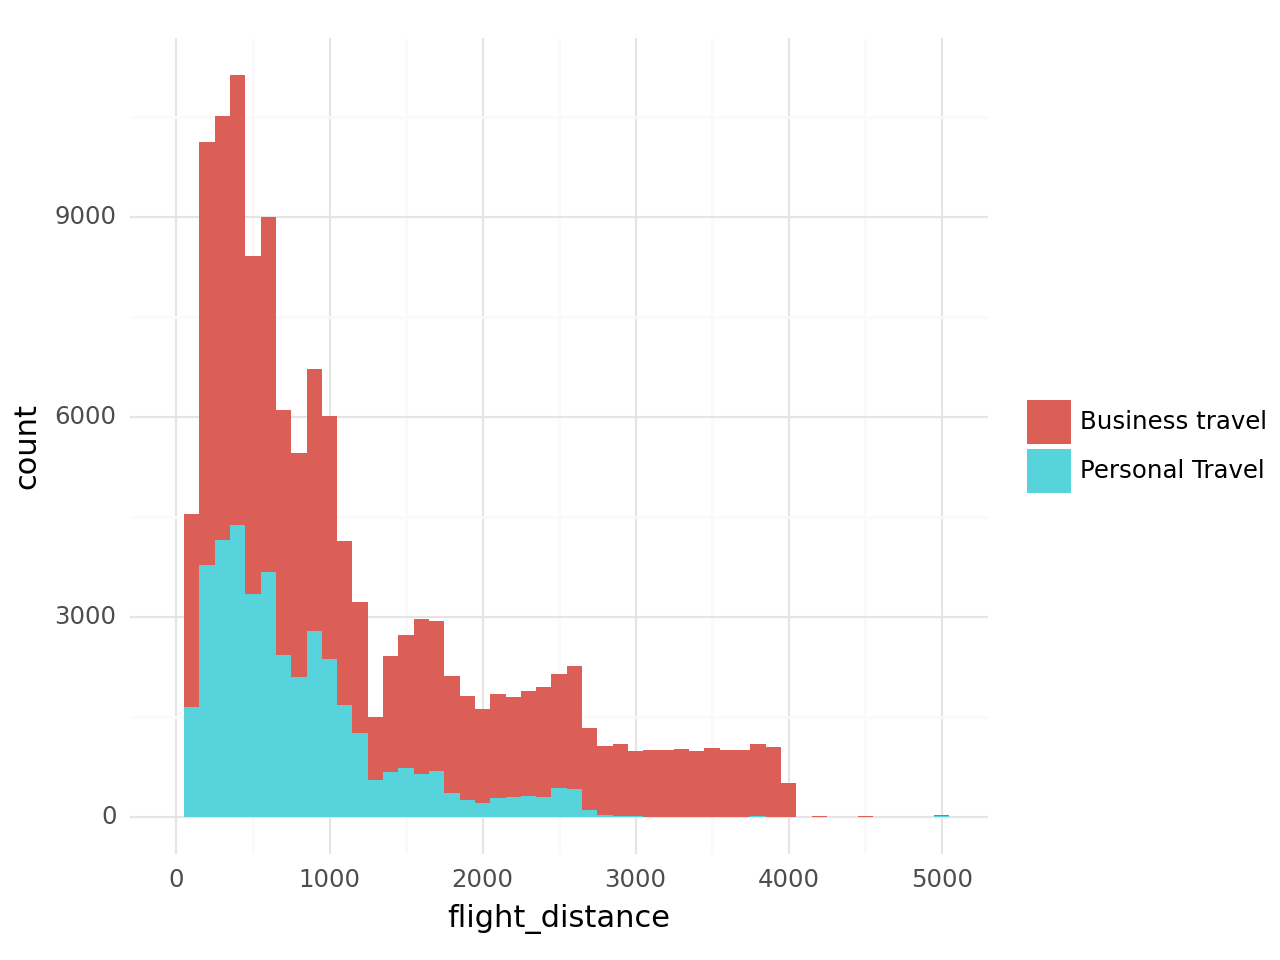

In [48]:
g=(
    ggplot(data=df)
    +geom_histogram(
        aes(x='flight_distance', fill='type_of_travel'),
        binwidth=100,
    )
    +theme_minimal()
    +theme(legend_title=element_blank()) 
)
print(g)

Conforme esperado, voôs mais longos são em sua maioria a negócios, o que ajuda a entender a maior satisfação destes clientes! 

In [ ]:
df.info()

In [56]:
pesq_satisf = df.columns[7:21]

In [94]:
for i in pesq_satisf:
    print(i, ': Most costumers votting:', df[i].mode().values)

inflight_wifi_service : Most costumers votting: [2]
departure_arrival_time_convenient : Most costumers votting: [4]
ease_of_online_booking : Most costumers votting: [3]
gate_location : Most costumers votting: [3]
food_and_drink : Most costumers votting: [4]
online_boarding : Most costumers votting: [4]
seat_comfort : Most costumers votting: [4]
inflight_entertainment : Most costumers votting: [4]
on_board_service : Most costumers votting: [4]
leg_room_service : Most costumers votting: [4]
baggage_handling : Most costumers votting: [4]
check_in_service : Most costumers votting: [4]
inflight_service : Most costumers votting: [4]
cleanliness : Most costumers votting: [4]


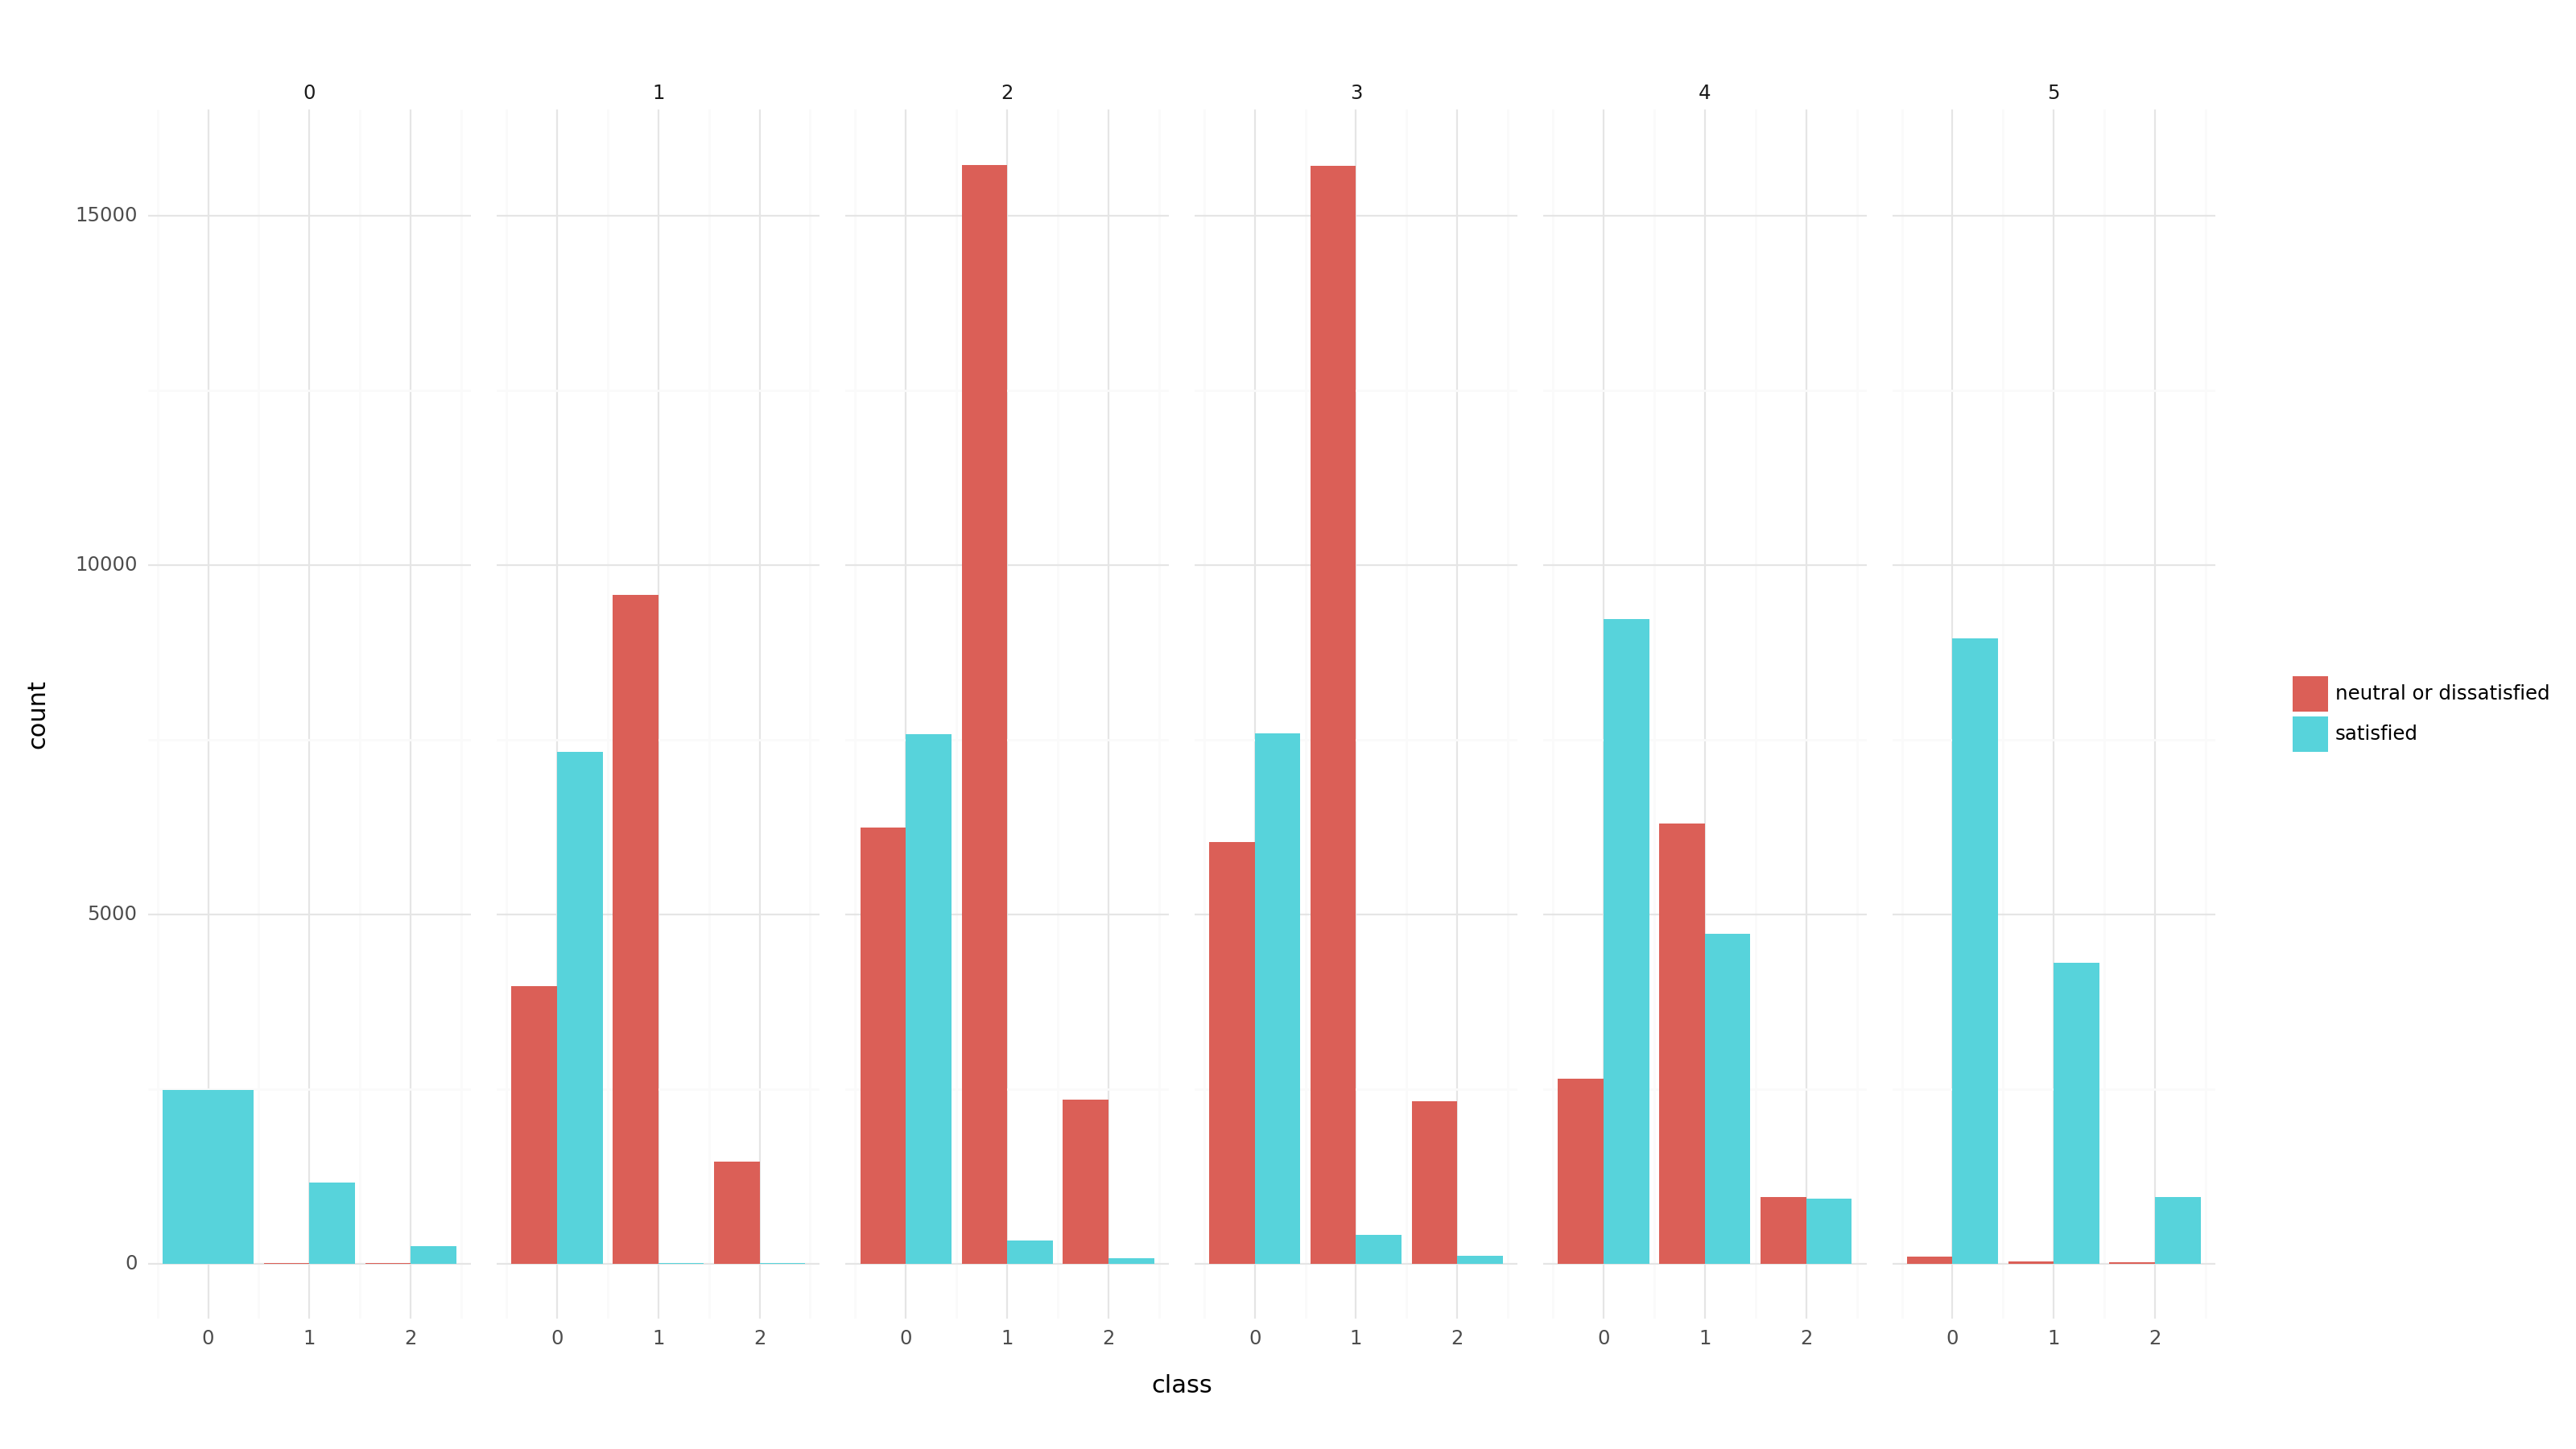

In [97]:
g=(
    ggplot(data=df)
    +geom_col(
        aes(
            x='class',
            fill='satisfaction'
        ),
        stat='count',
        position='dodge'
    )
    +facet_grid('.~inflight_wifi_service')
    +theme_minimal()
    +theme(legend_title=element_blank(), figure_size=(16,9))
)
print(g)

A insatisfação com o Wi-fi parece refletir na satisfação final dos clientes